In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import urllib2 as url
import statsmodels.api as sm
import statsmodels.formula.api as smf
from __future__ import print_function, division


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set() # you can comment out this line if you don't
# have seaborn installed; it just serves to make some of the plots prettier
#from sklearn.decomposition import PCA
#from sklearn.decomposition import KernelPCA
#from sklearn.decomposition import SparsePCA
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("data.csv")
data.head

<bound method DataFrame.head of                               Row Labels  2011A04  2012A04  2013A04  2011A514  \
0                Kingsbridge - Riverdale     56.1     65.2     41.6      30.5   
1                        Northeast Bronx    128.7    135.9    124.0      60.5   
2                     Fordham - Bronx Pk    126.9    131.6    137.6      61.4   
3                   Pelham - Throgs Neck    139.8    153.9    131.6      62.4   
4                       Crotona -Tremont    163.8    142.6    150.5      61.4   
5               High Bridge - Morrisania    157.6    164.5    188.7      64.3   
6               Hunts Point - Mott Haven    200.1    203.3    176.2      87.4   
7                             Greenpoint     26.9     15.5     14.1      13.4   
8             Downtown - Heights - Slope     61.0     59.8     39.0      37.2   
9     Bedford Stuyvesant - Crown Heights    135.9    123.1    123.6      59.1   
10                         East New York    104.0    113.0    105.0      46.1

In [3]:
newdata = pd.DataFrame.dropna(data)

In [4]:
newdata

,Row Labels,2011A04,2012A04,2013A04,2011A514,2012A514,2013A514,Leaks,Cracks,Broken,Mold,M_A04,M_A514
0,Kingsbridge - Riverdale,56.1,65.2,41.6,30.5,27.7,43.0,27.4,19.5,1.7,8.4,54.300000,33.73333333
1,Northeast Bronx,128.7,135.9,124.0,60.5,57.3,67.6,22.3,18.2,6.3,8.9,129.533333,61.8
2,Fordham - Bronx Pk,126.9,131.6,137.6,61.4,69.3,73.3,31.6,26.1,6.2,18.7,132.033333,68
3,Pelham - Throgs Neck,139.8,153.9,131.6,62.4,66.6,55.3,26.0,20.0,6.0,14.4,141.766667,61.43333333
4,Crotona -Tremont,163.8,142.6,150.5,61.4,74.5,72.9,30.3,29.0,5.8,11.8,152.300000,69.6
5,High Bridge - Morrisania,157.6,164.5,188.7,64.3,75.2,79.4,29.3,29.3,9.4,11.8,170.266667,72.96666667
6,Hunts Point - Mott Haven,200.1,203.3,176.2,87.4,98.9,98.7,30.6,33.0,8.2,11.8,193.200000,95
7,Greenpoint,26.9,15.5,14.1,13.4,13.1,7.9,23.3,14.1,7.1,16.0,18.833333,11.46666667
8,Downtown - Heights - Slope,61.0,59.8,39.0,37.2,28.8,24.1,27.6,21.4,11.1,7.6,53.266667,30.03333333
9,Bedford Stuyvesant - Crown Heights,135.9,123.1,123.6,59.1,64.5,64.8,25.9,22.1,18.8,9.4,127.533333,62.8


In [5]:
mod = smf.ols('M_A04 ~ Leaks', data = newdata).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  M_A04   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     21.37
Date:                Fri, 11 Mar 2016   Prob (F-statistic):           5.27e-05
Time:                        15:38:57   Log-Likelihood:                -182.77
No. Observations:                  36   AIC:                             369.5
Df Residuals:                      34   BIC:                             372.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -9.1028     19.095     -0.477      0.6

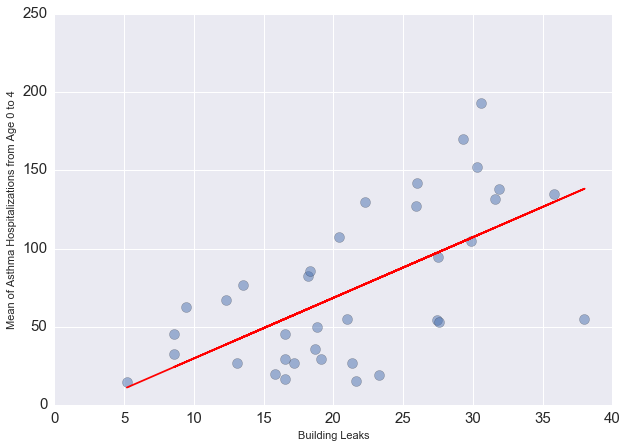

In [6]:
newdata[['M_A04', 'Leaks']].plot(kind='scatter', x='Leaks', y='M_A04',marker='o', s=100, 
                                    alpha=0.5,figsize=(10,7), fontsize=15)
plt.xlabel('Building Leaks') 
plt.ylabel('Mean of Asthma Hospitalizations from Age 0 to 4') 
#plt.xlim(-1500, 5100000)
#plt.ylim(-5, 30)
plot(newdata['Leaks'],mod.predict(), color = 'r')

In [7]:
mod1 = smf.ols('M_A04 ~ Cracks', data = newdata).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                  M_A04   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     39.49
Date:                Fri, 11 Mar 2016   Prob (F-statistic):           3.69e-07
Time:                        15:38:57   Log-Likelihood:                -177.68
No. Observations:                  36   AIC:                             359.4
Df Residuals:                      34   BIC:                             362.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1116     12.906      0.086      0.9

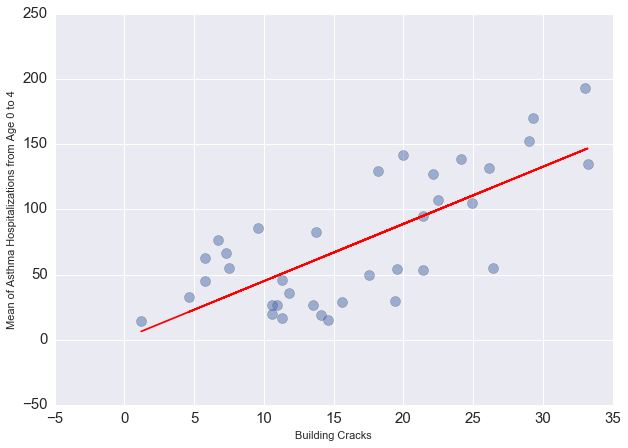

In [8]:
newdata[['M_A04', 'Cracks']].plot(kind='scatter', x='Cracks', y='M_A04',marker='o', s=100, 
                                    alpha=0.5,figsize=(10,7), fontsize=15)
plt.xlabel('Building Cracks') 
plt.ylabel('Mean of Asthma Hospitalizations from Age 0 to 4') 
#plt.xlim(-1500, 5100000)
#plt.ylim(-5, 30)
plot(newdata['Cracks'],mod1.predict(), color = 'r')

In [9]:
mod3 = smf.ols('M_A04 ~ Broken', data = newdata).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                  M_A04   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     7.167
Date:                Fri, 11 Mar 2016   Prob (F-statistic):             0.0113
Time:                        15:38:57   Log-Likelihood:                -188.11
No. Observations:                  36   AIC:                             380.2
Df Residuals:                      34   BIC:                             383.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     44.8357     13.241      3.386      0.0

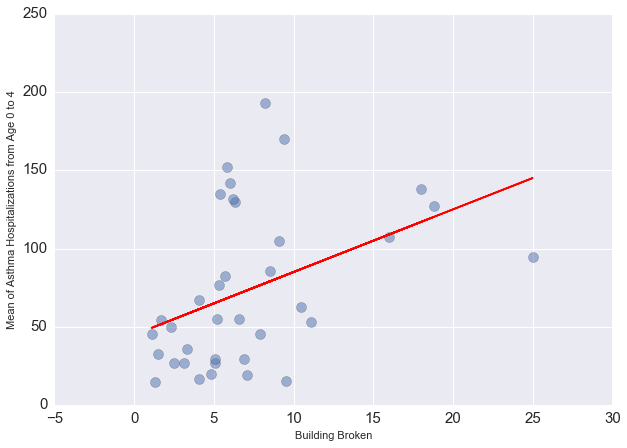

In [10]:
newdata[['M_A04', 'Broken']].plot(kind='scatter', x='Broken', y='M_A04',marker='o', s=100, 
                                    alpha=0.5,figsize=(10,7), fontsize=15)
plt.xlabel('Building Broken') 
plt.ylabel('Mean of Asthma Hospitalizations from Age 0 to 4') 
#plt.xlim(-1500, 5100000)
#plt.ylim(-5, 30)
plot(newdata['Broken'],mod3.predict(), color = 'r')

In [29]:
mod6 = smf.ols('M_A04 ~ Mold', data = newdata).fit()
print(mod6.summary())

                            OLS Regression Results                            
Dep. Variable:                  M_A04   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     4.693
Date:                Fri, 11 Mar 2016   Prob (F-statistic):             0.0374
Time:                        15:55:48   Log-Likelihood:                -189.22
No. Observations:                  36   AIC:                             382.4
Df Residuals:                      34   BIC:                             385.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     24.8769     23.876      1.042      0.3

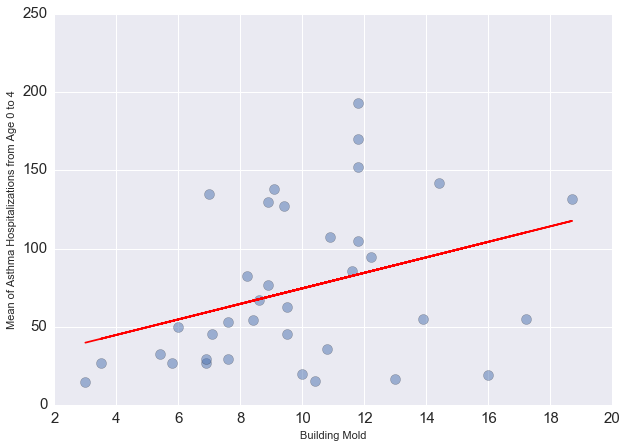

In [31]:
newdata[['M_A04', 'Mold']].plot(kind='scatter', x='Mold', y='M_A04',marker='o', s=100, 
                                    alpha=0.5,figsize=(10,7), fontsize=15)
plt.xlabel('Building Mold') 
plt.ylabel('Mean of Asthma Hospitalizations from Age 0 to 4') 
#plt.xlim(-1500, 5100000)
#plt.ylim(-5, 30)
plot(newdata['Mold'],mod6.predict(), color = 'r')

In [13]:
ds = newdata[['M_A514','Broken']]
ds

,M_A514,Broken
0,33.73333333,1.7
1,61.8,6.3
2,68,6.2
3,61.43333333,6.0
4,69.6,5.8
5,72.96666667,9.4
6,95,8.2
7,11.46666667,7.1
8,30.03333333,11.1
9,62.8,18.8


In [20]:
d = pd.read_csv("newdata.csv")
d.head

<bound method DataFrame.head of                               Row Labels     M_A514  Leaks  Cracks  Broken  \
0                Kingsbridge - Riverdale  33.733333   27.4    19.5     1.7   
1                        Northeast Bronx  61.800000   22.3    18.2     6.3   
2                     Fordham - Bronx Pk  68.000000   31.6    26.1     6.2   
3                   Pelham - Throgs Neck  61.433333   26.0    20.0     6.0   
4                       Crotona -Tremont  69.600000   30.3    29.0     5.8   
5               High Bridge - Morrisania  72.966667   29.3    29.3     9.4   
6               Hunts Point - Mott Haven  95.000000   30.6    33.0     8.2   
7                             Greenpoint  11.466667   23.3    14.1     7.1   
8             Downtown - Heights - Slope  30.033333   27.6    21.4    11.1   
9     Bedford Stuyvesant - Crown Heights  62.800000   25.9    22.1    18.8   
10                         East New York  50.466667   20.4    22.5    16.0   
11                           Sun

In [22]:
newd = pd.DataFrame.dropna(d)
newd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 41
Data columns (total 6 columns):
Row Labels    38 non-null object
M_A514        38 non-null float64
Leaks         38 non-null float64
Cracks        38 non-null float64
Broken        38 non-null float64
Mold          38 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.1+ KB


In [24]:
mod4 = smf.ols('M_A514 ~ Leaks', data = newd).fit()
print (mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                 M_A514   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     37.48
Date:                Fri, 11 Mar 2016   Prob (F-statistic):           4.77e-07
Time:                        15:51:21   Log-Likelihood:                -161.11
No. Observations:                  38   AIC:                             326.2
Df Residuals:                      36   BIC:                             329.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -10.1526      7.716     -1.316      0.1

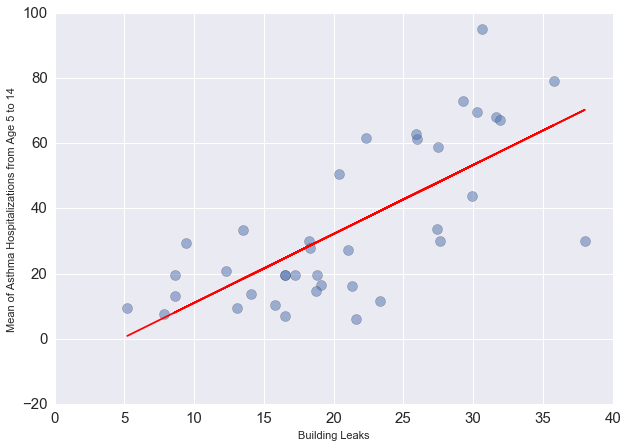

In [26]:
newd[['M_A514', 'Leaks']].plot(kind='scatter', x='Leaks', y='M_A514',marker='o', s=100, 
                                    alpha=0.5,figsize=(10,7), fontsize=15)
plt.xlabel('Building Leaks') 
plt.ylabel('Mean of Asthma Hospitalizations from Age 5 to 14') 
#plt.xlim(-1500, 5100000)
#plt.ylim(-5, 30)
plot(newd['Leaks'],mod4.predict(), color = 'r')

In [27]:
mod5 = smf.ols('M_A514 ~ Broken', data = newd).fit()
print (mod5.summary())

                            OLS Regression Results                            
Dep. Variable:                 M_A514   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     10.61
Date:                Fri, 11 Mar 2016   Prob (F-statistic):            0.00246
Time:                        15:53:32   Log-Likelihood:                -169.76
No. Observations:                  38   AIC:                             343.5
Df Residuals:                      36   BIC:                             346.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.0311      6.001      3.005      0.0

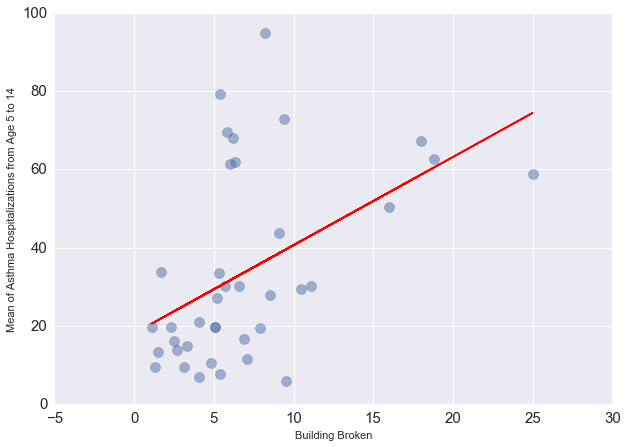

In [28]:
newd[['M_A514', 'Broken']].plot(kind='scatter', x='Broken', y='M_A514',marker='o', s=100, 
                                    alpha=0.5,figsize=(10,7), fontsize=15)
plt.xlabel('Building Broken') 
plt.ylabel('Mean of Asthma Hospitalizations from Age 5 to 14') 
#plt.xlim(-1500, 5100000)
#plt.ylim(-5, 30)
plot(newd['Broken'],mod5.predict(), color = 'r')

In [32]:
mod7 = smf.ols('M_A514 ~ Cracks', data = newd).fit()
print (mod7.summary())

                            OLS Regression Results                            
Dep. Variable:                 M_A514   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     68.76
Date:                Fri, 11 Mar 2016   Prob (F-statistic):           7.18e-10
Time:                        15:57:26   Log-Likelihood:                -154.37
No. Observations:                  38   AIC:                             312.7
Df Residuals:                      36   BIC:                             316.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.5248      5.083     -0.694      0.4

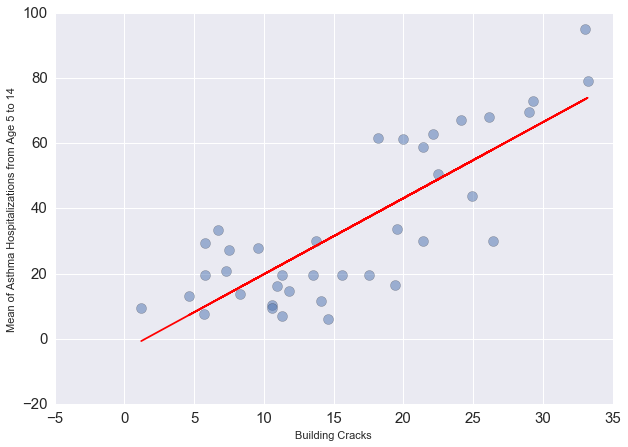

In [33]:
newd[['M_A514', 'Cracks']].plot(kind='scatter', x='Cracks', y='M_A514',marker='o', s=100, 
                                    alpha=0.5,figsize=(10,7), fontsize=15)
plt.xlabel('Building Cracks') 
plt.ylabel('Mean of Asthma Hospitalizations from Age 5 to 14') 
#plt.xlim(-1500, 5100000)
#plt.ylim(-5, 30)
plot(newd['Cracks'],mod7.predict(), color = 'r')

In [34]:
mod8 = smf.ols('M_A514 ~ Mold', data = newd).fit()
print (mod8.summary())

                            OLS Regression Results                            
Dep. Variable:                 M_A514   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     6.033
Date:                Fri, 11 Mar 2016   Prob (F-statistic):             0.0190
Time:                        15:58:41   Log-Likelihood:                -171.72
No. Observations:                  38   AIC:                             347.4
Df Residuals:                      36   BIC:                             350.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.8234     10.467      0.939      0.3

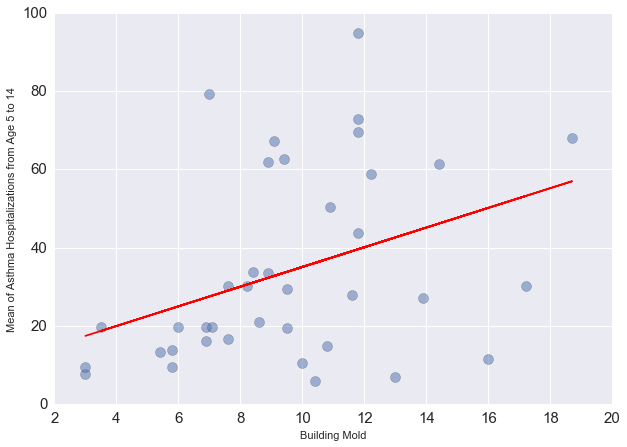

In [36]:
newd[['M_A514', 'Mold']].plot(kind='scatter', x='Mold', y='M_A514',marker='o', s=100, 
                                    alpha=0.5,figsize=(10,7), fontsize=15)
plt.xlabel('Building Mold') 
plt.ylabel('Mean of Asthma Hospitalizations from Age 5 to 14') 
#plt.xlim(-1500, 5100000)
#plt.ylim(-5, 30)
plot(newd['Mold'],mod8.predict(), color = 'r')